**Objectives**:

In this notebook, we are going to be creating several machine learning models for the predictions of energy generated by a wind turbine system, given the weather conditions an hour prior

**WORKFLOW:**

In order to accomplish the above goal, we need to perform the following

1. Data Loading and Understanding

2. Cleaning the data

3. Feature engineering

4. Explanatory Data Analysis

5. Modelling

6. Hyperparameter Tuning

7. Model Selection

8. Inference Script Creation

**Data Loading**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('TexasTurbine.csv')

In [ ]:
data.head(5)

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963


**Cleaning the data**

In [ ]:
#check for missing values
#fix the timestamp
#set timestamp as index
#check for duplicates

In [ ]:
data.isna().sum()

Time stamp                       0
System power generated | (kW)    0
Wind speed | (m/s)               0
Wind direction | (deg)           0
Pressure | (atm)                 0
Air temperature | ('C)           0
dtype: int64

In [ ]:
data

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963
...,...,...,...,...,...,...
8755,"Dec 31, 07:00 pm",1234.70,8.848,129,0.998604,19.663
8756,"Dec 31, 08:00 pm",1105.37,8.502,118,1.000090,19.063
8757,"Dec 31, 09:00 pm",1405.71,9.224,117,0.998408,18.463
8758,"Dec 31, 10:00 pm",1221.36,8.799,116,0.998013,18.063


In [ ]:
data['Time stamp'] = pd.to_datetime(data['Time stamp'], format = "%b %d, %I:%M %p").dt.strftime('%Y-%m-%d %H:%M:%S')
data['Time stamp'] = data['Time stamp'].str.replace("1900", "2024")
#convert
data['Time stamp'] = pd.to_datetime(data['Time stamp'])

In [ ]:
data.index = data['Time stamp']
data.drop('Time stamp', axis=1, inplace=True)

In [ ]:
data

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
Time stamp,,,,,
2024-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263
2024-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363
2024-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663
2024-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763
2024-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963
...,...,...,...,...,...
2024-12-31 19:00:00,1234.70,8.848,129,0.998604,19.663
2024-12-31 20:00:00,1105.37,8.502,118,1.000090,19.063
2024-12-31 21:00:00,1405.71,9.224,117,0.998408,18.463


In [ ]:
#checking for duplicates
data.duplicated().sum()

0

**FEATURE ENGINEERING**

In [ ]:
###Extract the following information from date index: day of week, week, month, quarter and year

In [ ]:
def extract_features(dataframe):
  """
  This function extracts date features from index and aslo create a season column
  """
  #copy dataframe
  dataframe = dataframe.copy()
  dataframe['quarter'] = dataframe.index.quarter
  dataframe['month'] = dataframe.index.month
  dataframe['week'] = dataframe.index.isocalendar().week.astype(int)
  dataframe['hour'] = dataframe.index.hour

  return dataframe

def map_month_to_season(month):
  if 3<=month<=5:
    return 'Spring'
  elif 6<=month<=8:
    return 'Summer'
  elif 9<=month<=11:
    return 'Fall'
  else:
    return 'Winter'



In [ ]:
data = extract_features(data)

In [ ]:
data['season'] = data['month'].apply(map_month_to_season)

In [ ]:
data.head(5)

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),quarter,month,week,hour,season
Time stamp,,,,,,,,,,
2024-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,1,0,Winter
2024-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,1,1,Winter
2024-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,1,2,Winter
2024-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,1,3,Winter
2024-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,1,4,Winter


In [ ]:
#view my data types
data.dtypes

System power generated | (kW)    float64
Wind speed | (m/s)               float64
Wind direction | (deg)             int64
Pressure | (atm)                 float64
Air temperature | ('C)           float64
quarter                            int32
month                              int32
week                               int64
hour                               int32
season                            object
dtype: object

In [ ]:
data.columns = ['power_generated', 'Wind_speed',
       'wind_dir', 'pressure', 'temperature',
       'quarter', 'month', 'week', 'hour', 'season']

In [ ]:
data.columns

Index(['power_generated', 'Wind_speed', 'wind_dir', 'pressure', 'temperature',
       'quarter', 'month', 'week', 'hour', 'season'],
      dtype='object')

In [ ]:
data.head(5)

,power_generated,Wind_speed,wind_dir,pressure,temperature,quarter,month,week,hour,season
Time stamp,,,,,,,,,,
2024-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,1,0,Winter
2024-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,1,1,Winter
2024-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,1,2,Winter
2024-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,1,3,Winter
2024-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,1,4,Winter


**EXPLANATORY DATA ANALYSIS**

In [ ]:
#Univariate: power generated, wind speed, direction, pressure and season
#multivariate


<Axes: xlabel='power_generated', ylabel='Count'>

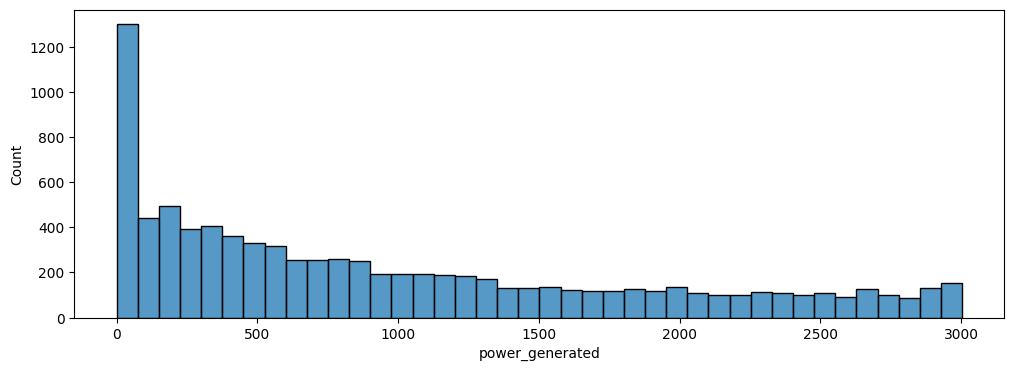

In [ ]:
#visualizing the distribution for power generated
#specify plot size
plt.figure(figsize=(12,4))
#create a histogram
sns.histplot(data['power_generated'], bins=40)

In [ ]:
data.power_generated.mean()

964.4679340166095

In [ ]:
#statistics on the column
data.power_generated.describe()

count    8760.000000
mean      964.467934
std       878.558112
min         0.000000
25%       215.951500
50%       693.968500
75%      1562.287500
max      3004.010000
Name: power_generated, dtype: float64

In [ ]:
#selecting out null power generated rows
data[data['power_generated']<=0]
#in 822 instances we get power gen to be 0


,power_generated,Wind_speed,wind_dir,pressure,temperature,quarter,month,week,hour,season
Time stamp,,,,,,,,,,
2024-01-05 00:00:00,0.0,2.491,156,0.991694,20.263,1,1,1,0,Winter
2024-01-05 01:00:00,0.0,0.484,95,0.994162,19.963,1,1,1,1,Winter
2024-01-07 22:00:00,0.0,2.788,340,1.002560,10.863,1,1,1,22,Winter
2024-01-07 23:00:00,0.0,2.116,273,1.001870,11.963,1,1,1,23,Winter
2024-01-08 00:00:00,0.0,2.897,284,1.000980,12.063,1,1,2,0,Winter
...,...,...,...,...,...,...,...,...,...,...
2024-12-27 23:00:00,0.0,2.748,241,0.997129,13.863,4,12,52,23,Winter
2024-12-28 00:00:00,0.0,2.135,271,0.996338,14.163,4,12,52,0,Winter
2024-12-28 01:00:00,0.0,2.076,246,0.996338,14.163,4,12,52,1,Winter


In [ ]:
data[data['power_generated']<=0]['season'].value_counts()

season
Fall      284
Winter    239
Summer    191
Spring    108
Name: count, dtype: int64

<ipython-input-26-f3bbf85ee844>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts, palette = 'viridis')


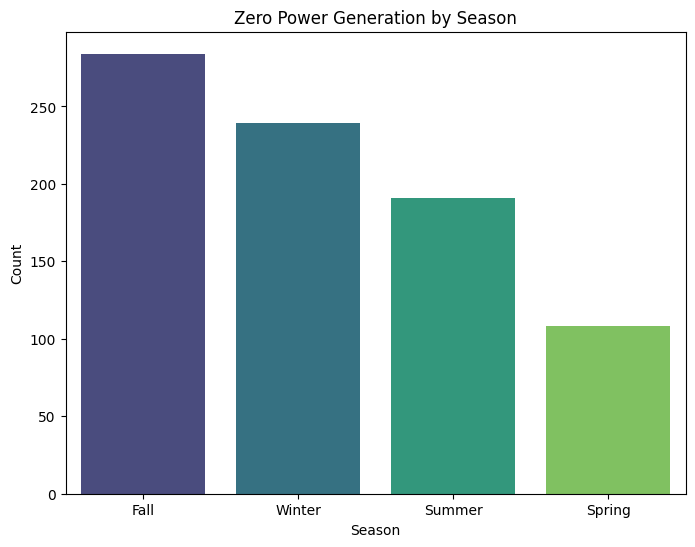

In [ ]:
#bar plot
season_counts = data[data['power_generated']<=0]['season'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=season_counts.index, y=season_counts, palette = 'viridis')
plt.title("Zero Power Generation by Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

<Axes: ylabel='power_generated'>

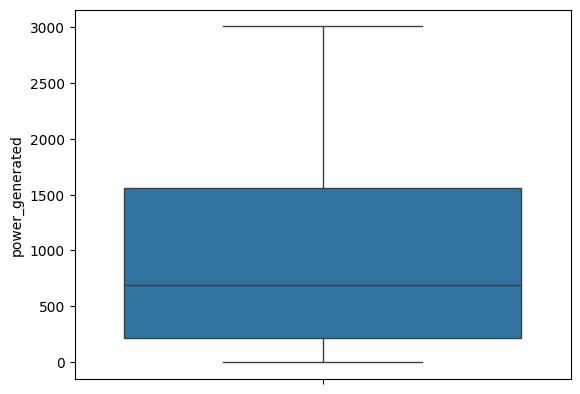

In [ ]:
#power generated outliers
sns.boxplot(data['power_generated'])

###there is an absence of outliers in the power gen column

<Axes: xlabel='Wind_speed', ylabel='Count'>

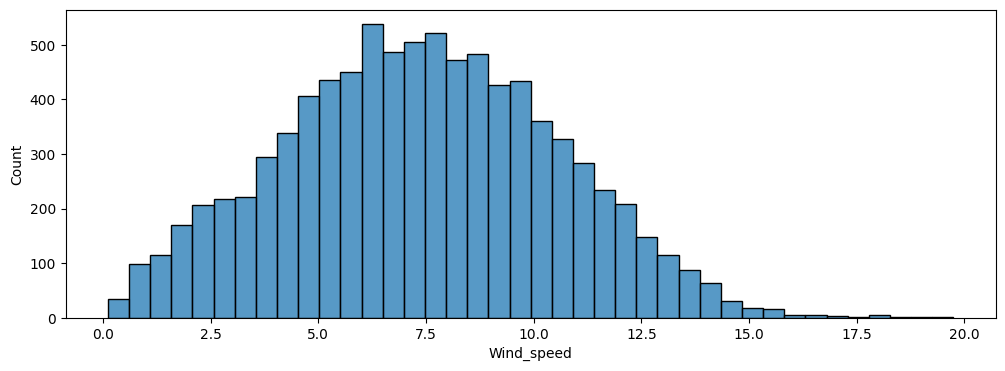

In [ ]:
#checking for distribution of wind speed
plt.figure(figsize=(12,4))
sns.histplot(data['Wind_speed'], bins=40)

###Wind speed is normally distributed

<Axes: ylabel='wind_dir'>

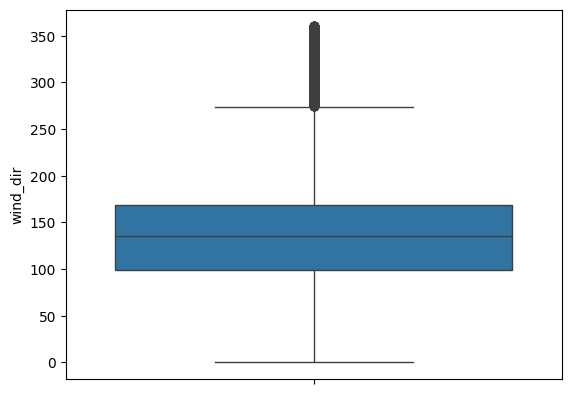

In [ ]:
sns.boxplot(data['wind_dir'])
#severity is not too large

#you could remove outliers by capping or transforming


<Axes: xlabel='wind_dir', ylabel='Count'>

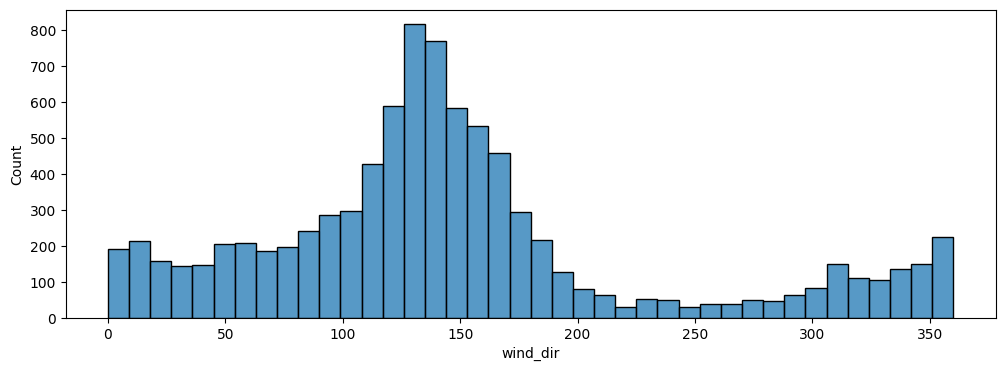

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(data['wind_dir'], bins=40)


Distribution of wind dir(in angles) is not strictly normal

<Axes: xlabel='pressure', ylabel='Count'>

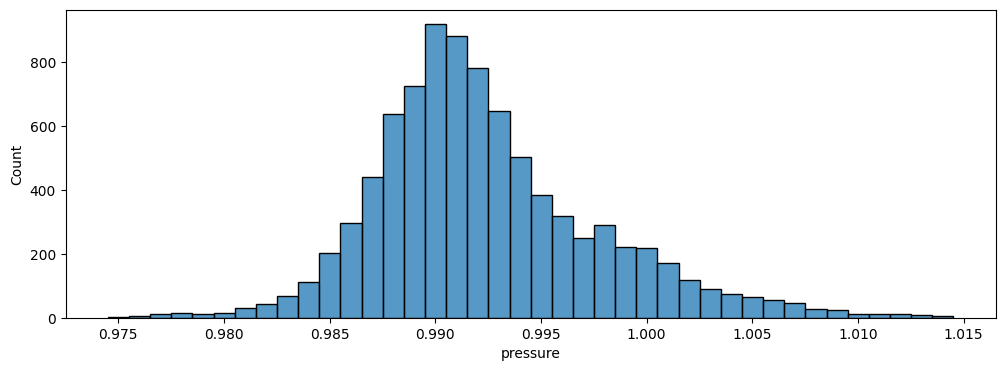

In [ ]:
#Distribution of pressure values:
plt.figure(figsize=(12,4))
sns.histplot(data['pressure'], bins=40)

<Axes: xlabel='temperature', ylabel='Count'>

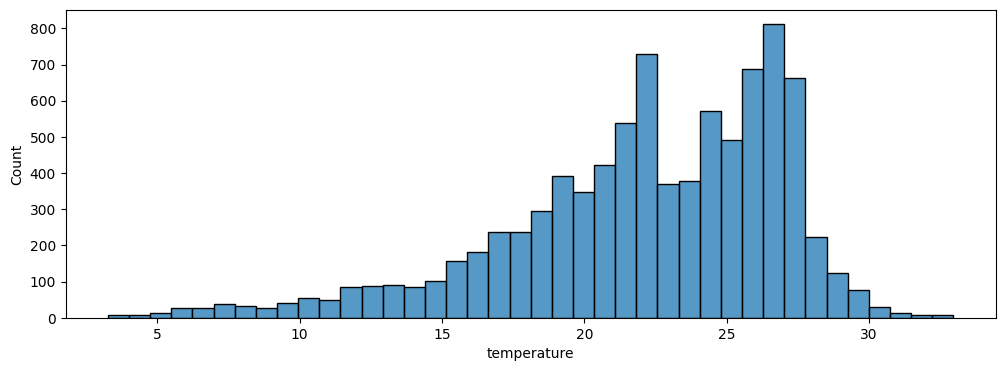

In [ ]:
#showing distribution of temperature
plt.figure(figsize=(12,4))
sns.histplot(data['temperature'], bins=40)

temperature is skewed to right probably due to the fact that warm days are more than cold days

**EDA (MULTIVARIATE)**

<Axes: xlabel='temperature', ylabel='pressure'>

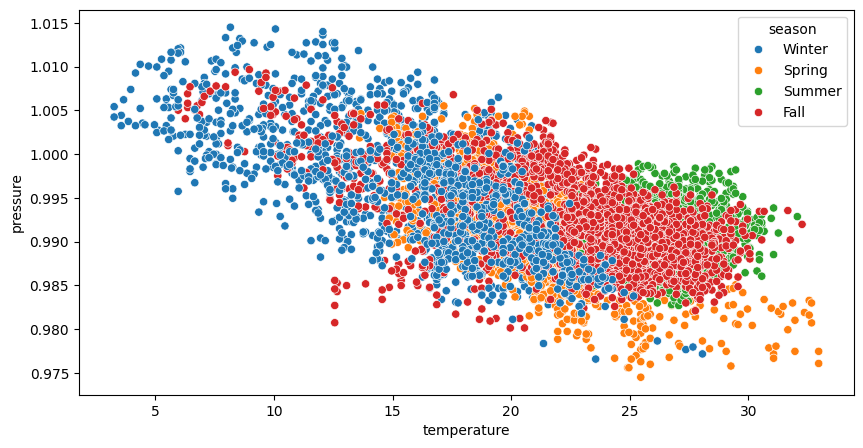

In [ ]:
#multivariate
#temp vs pressure
plt.figure(figsize = (10, 5))
sns.scatterplot(data=data, x='temperature', y='pressure', hue='season')

**Winter**: colder days(lowertemperature, lesss than 20

**Spring**: high temp at low pressure, and low temp at high pressure

**Summer**: high temperature

**Fall**: widest range of temperature and pressure

In [ ]:
data.columns

Index(['power_generated', 'Wind_speed', 'wind_dir', 'pressure', 'temperature',
       'quarter', 'month', 'week', 'hour', 'season'],
      dtype='object')

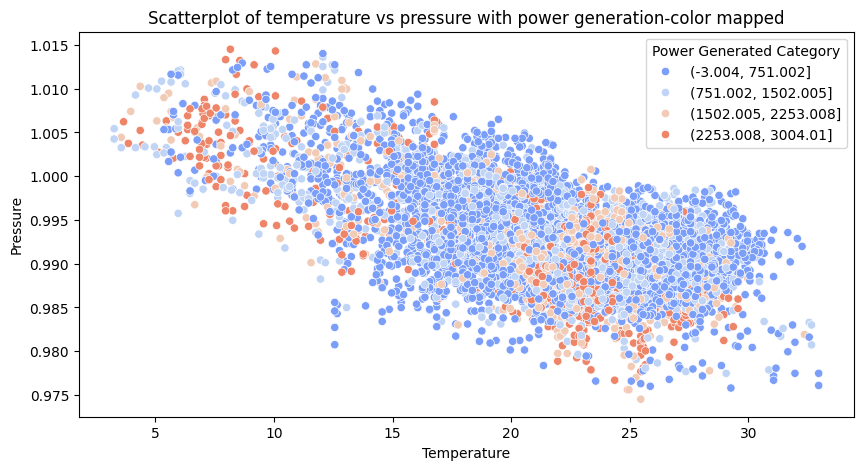

In [ ]:
#create bins of power generated values
num_bins = 4
binned_data = pd.cut(data['power_generated'], bins = num_bins)

#creating figure and specifying size
plt.figure(figsize = (10, 5))
sns.scatterplot(data = data, x='temperature', y='pressure', hue=binned_data, palette="coolwarm")

#adding title, legend, xlabel
plt.title('Scatterplot of temperature vs pressure with power generation-color mapped')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend(title="Power Generated Category", loc="upper right")
plt.show()


<Axes: xlabel='season', ylabel='power_generated'>

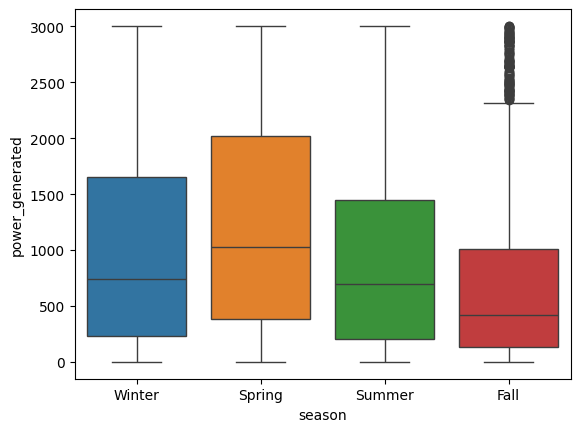

In [ ]:
#Observe the effect of season on power generation
sns.boxplot(data = data, y='power_generated', x='season', hue = 'season')

Spring is the most productive season for power generation and fall falls behind

<Axes: xlabel='season', ylabel='Wind_speed'>

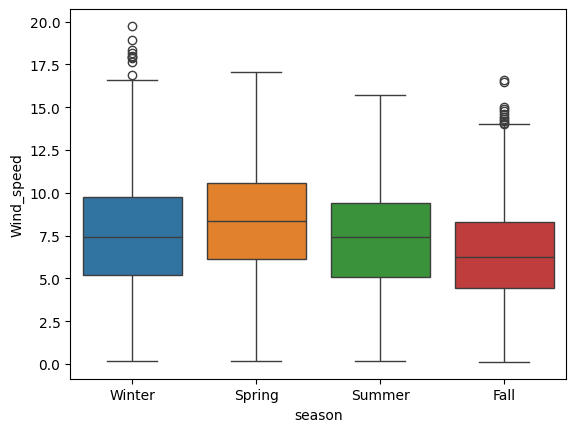

In [ ]:
#Wind characteristics
sns.boxplot(data=data, y='Wind_speed', x='season', hue='season')

<Axes: xlabel='month', ylabel='power_generated'>

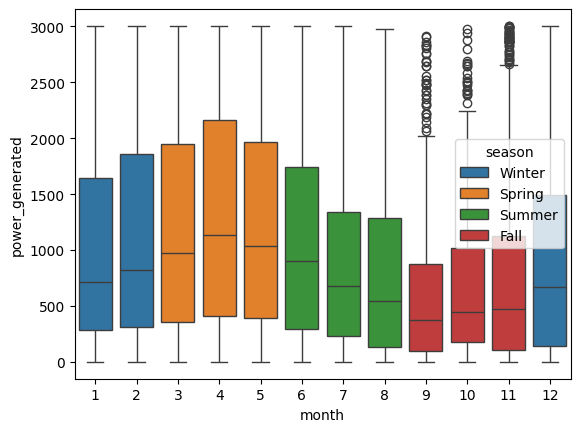

In [ ]:
#month and power generated
sns.boxplot(data=data, y='power_generated', x='month', hue='season')

Cyclical pattern emerges when you compare power generated vs month

<Axes: xlabel='month', ylabel='Wind_speed'>

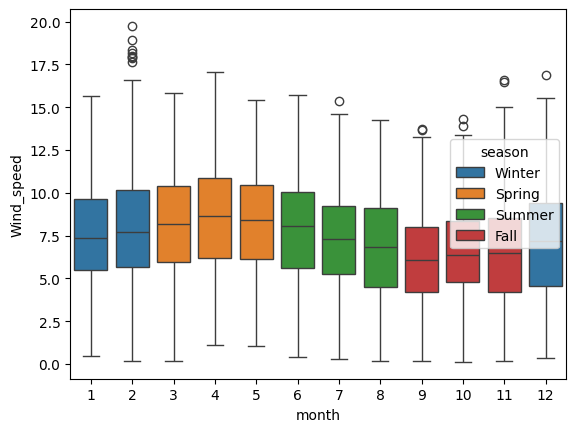

In [ ]:
#month and wind speed
sns.boxplot(data=data, y='Wind_speed', x='month', hue='season')

Pattern same for wind speed vs month

<Axes: xlabel='Wind_speed', ylabel='power_generated'>

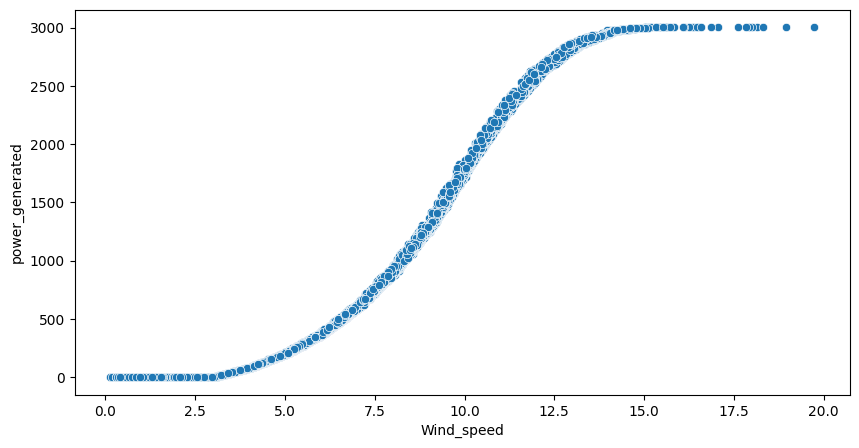

In [ ]:
#scatter plot for wind speed vs power generated
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='Wind_speed', y='power_generated')

power generation curve

wind speed less than 2.5 doesn't lead to power generation

In [ ]:
data['wind_dir']
bin_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
bin_edge = [-1, 45, 90, 135, 180, 225, 270, 315, 360]
binned_data = pd.cut(data['wind_dir'], bins=bin_edge, labels=bin_labels)

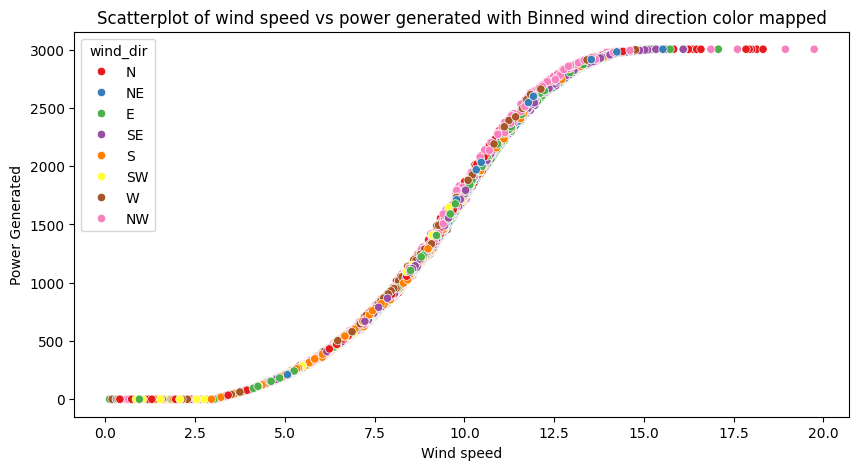

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='Wind_speed', y='power_generated', hue = binned_data, palette='Set1')

#adding title, legend, xlabel
plt.title('Scatterplot of wind speed vs power generated with Binned wind direction color mapped')
plt.xlabel('Wind speed')
plt.ylabel('Power Generated')

plt.show()

<Axes: xlabel='wind_dir', ylabel='power_generated'>

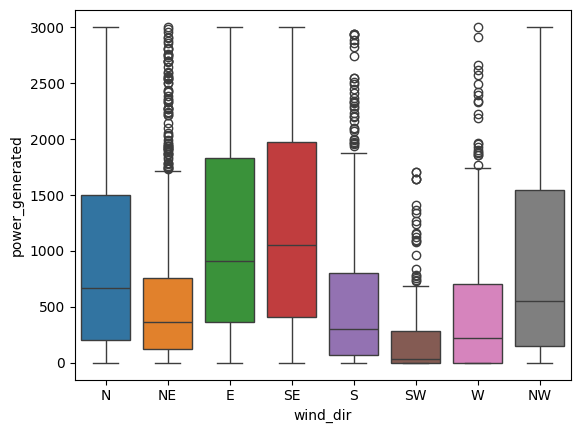

In [ ]:
sns.boxplot(y=data['power_generated'], x=binned_data, hue=binned_data)


Wind direction also influences power generated values

In [ ]:
#add the wind orientation feature
data['wind_orientation'] = binned_data

In [ ]:
data.head(5)

,power_generated,Wind_speed,wind_dir,pressure,temperature,quarter,month,week,hour,season,wind_orientation
Time stamp,,,,,,,,,,,
2024-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,1,0,Winter,E
2024-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,1,1,Winter,E
2024-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,1,2,Winter,SE
2024-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,1,3,Winter,SE
2024-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,1,4,Winter,SE


**ENCODING AND MODELLING**

In [ ]:
data.columns

Index(['power_generated', 'Wind_speed', 'wind_dir', 'pressure', 'temperature',
       'quarter', 'month', 'week', 'hour', 'season', 'wind_orientation'],
      dtype='object')

In [ ]:
len(data) * 0.3

2628.0

In [ ]:
train_data = data[:-2628]
test_data = data[-2628:]

In [ ]:
train_data

,power_generated,Wind_speed,wind_dir,pressure,temperature,quarter,month,week,hour,season,wind_orientation
Time stamp,,,,,,,,,,,
2024-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,1,0,Winter,E
2024-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,1,1,Winter,E
2024-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,1,2,Winter,SE
2024-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,1,3,Winter,SE
2024-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,1,4,Winter,SE
...,...,...,...,...,...,...,...,...,...,...,...
2024-09-13 07:00:00,0.00,1.513,239,0.993169,26.863,3,9,37,7,Fall,SW
2024-09-13 08:00:00,0.00,1.770,276,0.991688,27.563,3,9,37,8,Fall,W
2024-09-13 09:00:00,0.00,1.977,328,0.992971,29.063,3,9,37,9,Fall,NW


In [ ]:
test_data

,power_generated,Wind_speed,wind_dir,pressure,temperature,quarter,month,week,hour,season,wind_orientation
Time stamp,,,,,,,,,,,
2024-09-13 12:00:00,0.000,2.481,105,0.991981,32.263,3,9,37,12,Fall,E
2024-09-13 13:00:00,127.025,4.469,101,0.990205,31.763,3,9,37,13,Fall,E
2024-09-13 14:00:00,714.714,7.474,93,0.991391,29.763,3,9,37,14,Fall,E
2024-09-13 15:00:00,1121.150,8.660,101,0.992279,28.863,3,9,37,15,Fall,E
2024-09-13 16:00:00,623.060,7.177,103,0.989713,29.163,3,9,37,16,Fall,E
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,1234.700,8.848,129,0.998604,19.663,4,12,1,19,Winter,E
2024-12-31 20:00:00,1105.370,8.502,118,1.000090,19.063,4,12,1,20,Winter,E
2024-12-31 21:00:00,1405.710,9.224,117,0.998408,18.463,4,12,1,21,Winter,E


In [ ]:
#perform mean encoding for season
season_mean = train_data.groupby('season')['power_generated'].mean()
data['season_mean_encoded'] = data['season'].map(season_mean)

In [ ]:
#perform mean encoding for wind orientation
wind_mean = train_data.groupby('wind_orientation')['power_generated'].mean()
data['wind_orientation_mean_encoded'] = data['wind_orientation'].map(wind_mean)

In [ ]:
data

,power_generated,Wind_speed,wind_dir,pressure,temperature,quarter,month,week,hour,season,wind_orientation,season_mean_encoded,wind_orientation_mean_encoded
Time stamp,,,,,,,,,,,,,
2024-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,1,0,Winter,E,1058.753692,1214.650349
2024-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,1,1,Winter,E,1058.753692,1214.650349
2024-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,1,2,Winter,SE,1058.753692,1248.372613
2024-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,1,3,Winter,SE,1058.753692,1248.372613
2024-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,1,4,Winter,SE,1058.753692,1248.372613
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,1234.70,8.848,129,0.998604,19.663,4,12,1,19,Winter,E,1058.753692,1214.650349
2024-12-31 20:00:00,1105.37,8.502,118,1.000090,19.063,4,12,1,20,Winter,E,1058.753692,1214.650349
2024-12-31 21:00:00,1405.71,9.224,117,0.998408,18.463,4,12,1,21,Winter,E,1058.753692,1214.650349


In [ ]:
data.drop(['season', 'wind_orientation'], axis = 1, inplace = True)

In [ ]:
train_data = data[:-2628]
test_data = data[-2628:]

In [ ]:
test_data

,power_generated,Wind_speed,wind_dir,pressure,temperature,quarter,month,week,hour,season_mean_encoded,wind_orientation_mean_encoded
Time stamp,,,,,,,,,,,
2024-09-13 12:00:00,0.000,2.481,105,0.991981,32.263,3,9,37,12,867.021622,1214.650349
2024-09-13 13:00:00,127.025,4.469,101,0.990205,31.763,3,9,37,13,867.021622,1214.650349
2024-09-13 14:00:00,714.714,7.474,93,0.991391,29.763,3,9,37,14,867.021622,1214.650349
2024-09-13 15:00:00,1121.150,8.660,101,0.992279,28.863,3,9,37,15,867.021622,1214.650349
2024-09-13 16:00:00,623.060,7.177,103,0.989713,29.163,3,9,37,16,867.021622,1214.650349
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,1234.700,8.848,129,0.998604,19.663,4,12,1,19,1058.753692,1214.650349
2024-12-31 20:00:00,1105.370,8.502,118,1.000090,19.063,4,12,1,20,1058.753692,1214.650349
2024-12-31 21:00:00,1405.710,9.224,117,0.998408,18.463,4,12,1,21,1058.753692,1214.650349


In [ ]:
#Modelling
#Linear models: Linear regression
#support vector machines: svr
#ensemble: rf, gbr

In [ ]:
#imports
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
#Slecting x and y train test values
target = 'power_generated'
features = ['Wind_speed', 'wind_dir', 'pressure', 'temperature', 'quarter', 'month', 'week', 'hour', 'season_mean_encoded', 'wind_orientation_mean_encoded']
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

In [ ]:
#Linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#Random Forest regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

#Support Vector machine
svr_model = SVR()
svr_model.fit(X_train, y_train)

#Gradient boosting regression
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
#making predictions  with models and evaluating
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
svr_predictions = svr_model.predict(X_test)
gbr_predictions = gbr_model.predict(X_test)

In [ ]:
#after predicting on test set, evaluating using mae
lr_mae = mean_absolute_error(y_test, lr_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
svr_mae = mean_absolute_error(y_test, svr_predictions)
gbr_mae = mean_absolute_error(y_test, gbr_predictions)

In [ ]:
print('linear regression', lr_mae)
print('random forest', rf_mae)
print('support vector machine', svr_mae)
print('gradient boosting regression', gbr_mae)

linear regression 228.9692904586744
random forest 5.533842439474854
support vector machine 620.6431262369003
gradient boosting regression 5.870966337369886


In [ ]:
#after predicting on test set, evaluating using mse
lr_mse = mean_squared_error(y_test, lr_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
gbr_mse = mean_squared_error(y_test, gbr_predictions)

In [ ]:
print('linear regression', lr_mse)
print('random forest', rf_mse)
print('support vector machine', svr_mse)
print('gradient boosting regression', gbr_mse)

linear regression 81220.05399872766
random forest 142.3797804292887
support vector machine 608393.9814196224
gradient boosting regression 76.87546034156009


In [ ]:
y_test.mean()

739.5319913727169

In [ ]:
#rf and gb
5/739*100

0.6765899864682002

**HYPERPARAMETER TUNING USING HYPEROPT AND BAYESIAN OPTIMIZATION**

Hyperparameter tuning is a crucial step in optimizing machine learning models. HyperOpt is a pyhton library that provides a convenient way to perform hyperparameter tuning using Bayesian optimization techniques. Bayesian optimization is a probalistic model-based optimization method that can effectively search the hyperparameter space to find the optimal set of hyperparameters for a given machine learning model.

In [ ]:
x_val = X_train[-1200:]
y_val = y_train[-1200:]

X_train = X_train[:-1200]
y_train = y_train[:-1200]

In [ ]:
import numpy as np
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# create a space
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 300, 10),
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'max_features': hp.choice('max_features', [ 'sqrt', 'log2', None])
}
#objective sample from this space, create a random forest model, evaluate the model, loss/mse
def objective(params):
  n_estimators = int(params['n_estimators'])
  max_depth = int(params['max_depth'])
  max_features = params['max_features']

  rf_model = RandomForestRegressor(n_estimators=n_estimators,
                                   max_depth=max_depth,
                                   max_features=max_features,
                                   random_state = 42)
  rf_model.fit(X_train, y_train)
  predictions = rf_model.predict(x_val)
  mse = mean_squared_error(y_val, predictions)
  return {'loss': mse, 'status': STATUS_OK}

#minimize
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials, verbose=1)
fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials, verbose=1)
print('Best HyperParameters:', best)

100%|██████████| 100/100 [00:00<?, ?trial/s, best loss=?]
Best HyperParameters: {'max_depth': 15.0, 'max_features': 2, 'n_estimators': 160.0}


In [ ]:
best_rf_hyperparameters = {'max_depth': 15.0, 'max_features': 2, 'n_estimators': 160.0}


In [ ]:
import numpy as np
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# create a space
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 300, 10),
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'subsample': hp.uniform('subsample', 0.1, 1.0)

}
#objective sample from this space, create a random forest model, evaluate the model, loss/mse
def objective(params):
  n_estimators = int(params['n_estimators'])
  max_depth = int(params['max_depth'])


  gb_model = GradientBoostingRegressor(n_estimators=n_estimators,
                                   max_depth=max_depth,
                                   learning_rate = params['learning_rate'],
                                   subsample = params['subsample'],
                                   random_state = 42)
  gb_model.fit(X_train, y_train)
  predictions = rf_model.predict(x_val)
  mse = mean_squared_error(y_val, predictions)
  return {'loss': mse, 'status': STATUS_OK}

#minimize
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials, verbose=1)
fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials, verbose=1)
print('Best HyperParameters:', best)

100%|██████████| 100/100 [00:00<?, ?trial/s, best loss=?]
Best HyperParameters: {'learning_rate': 0.3842485376066458, 'max_depth': 14.0, 'n_estimators': 170.0, 'subsample': 0.8337479489623787}


In [ ]:
best_gb_hyperparameters = {'learning_rate': 0.3842485376066458, 'max_depth': 14.0, 'n_estimators': 170.0, 'subsample': 0.8337479489623787}

In [ ]:
train_data = data[:-2628]
test_data = data[-2628:]

In [ ]:
#Slecting x and y train test values
target = 'power_generated'
features = ['Wind_speed', 'wind_dir', 'pressure', 'temperature', 'quarter', 'month', 'week', 'hour', 'season_mean_encoded', 'wind_orientation_mean_encoded']
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

In [ ]:
best_rf_hyperparameters

{'max_depth': 15.0, 'max_features': 2, 'n_estimators': 160.0}

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=160,
    max_depth=15,
    max_features=2,
    random_state=42
)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
print("MSE:", rf_mse, "MAE", rf_mae)

MSE: 78557.03013510308 MAE 188.80759803691745


In [ ]:
best_gb_hyperparameters

{'learning_rate': 0.3842485376066458,
 'max_depth': 14.0,
 'n_estimators': 170.0,
 'subsample': 0.8337479489623787}

In [ ]:
gb_model = GradientBoostingRegressor(
    n_estimators=170,
    max_depth=14,
    learning_rate = best_gb_hyperparameters['learning_rate'],
    subsample = best_gb_hyperparameters['subsample'],
    random_state=42
)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)
print("MSE:", gb_mse, "MAE", gb_mae)

MSE: 117.72698916951694 MAE 5.602907229451061


**The bet performing model: Gradient boosting regressor model using the best hyperparameter**

**INFERENCE SCRIPT CREATION**

In [ ]:
data = pd.read_csv('TexasTurbine.csv')
features = data.sample(5)
features
features.columns = ['Time stamp','power_generated', 'Wind_speed',
       'wind_dir', 'pressure', 'temperature']
targets = features['power_generated']
features.drop('power_generated', axis=1, inplace=True)

In [ ]:
features

,Time stamp,Wind_speed,wind_dir,pressure,temperature
429,"Jan 18, 09:00 pm",12.496,336,0.997921,11.163
802,"Feb 3, 10:00 am",5.210,188,0.991396,22.163
6417,"Sep 25, 09:00 am",5.655,299,0.987053,22.763
1765,"Mar 15, 01:00 pm",3.173,309,0.988832,18.863
5379,"Aug 13, 03:00 am",7.741,141,0.990504,27.063


In [ ]:
def fix_timestamp(data):
  """
  this function converts date and time column to a proper format and make fit the index
  """
  #Fixing the timestamp
  data['Time stamp'] = pd.to_datetime(data['Time stamp'], format = "%b %d, %I:%M %p").dt.strftime('%Y-%m-%d %H:%M:%S')
  data['Time stamp'] = data['Time stamp'].str.replace("1900", "2024")
  #converting to timestamp
  data['Time stamp'] = pd.to_datetime(data['Time stamp'])
  #set time stamp to be the new index
  data.index = data['Time stamp']
  #dropping the old column
  data.drop('Time stamp', axis=1, inplace=True)
  return data

In [ ]:
fix_timestamp(features)

,Wind_speed,wind_dir,pressure,temperature
Time stamp,,,,
2024-01-18 21:00:00,12.496,336,0.997921,11.163
2024-02-03 10:00:00,5.210,188,0.991396,22.163
2024-09-25 09:00:00,5.655,299,0.987053,22.763
2024-03-15 13:00:00,3.173,309,0.988832,18.863
2024-08-13 03:00:00,7.741,141,0.990504,27.063


In [ ]:
features = extract_features(features)
features['season'] = features['month'].apply(map_month_to_season)

In [ ]:
features

,Wind_speed,wind_dir,pressure,temperature,quarter,month,week,hour,season
Time stamp,,,,,,,,,
2024-01-18 21:00:00,12.496,336,0.997921,11.163,1,1,3,21,Winter
2024-02-03 10:00:00,5.210,188,0.991396,22.163,1,2,5,10,Winter
2024-09-25 09:00:00,5.655,299,0.987053,22.763,3,9,39,9,Fall
2024-03-15 13:00:00,3.173,309,0.988832,18.863,1,3,11,13,Spring
2024-08-13 03:00:00,7.741,141,0.990504,27.063,3,8,33,3,Summer


In [ ]:
def bin_wind_dir(data):
  """
  this function bins wind direction converts degrees to cardinal points
  """
  #Define the bin edges for wind direction
  bin_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
  bin_edge = [-1, 45, 90, 135, 180, 225, 270, 315, 360]
  #bin the wind dir column and assign labels
  binned_data = pd.cut(data['wind_dir'], bins=bin_edge, labels=bin_labels)
  data['wind_orientation'] = binned_data
  return data

In [ ]:
features = bin_wind_dir(features)

In [ ]:

def mean_encode(data, season_mean=season_mean, wind_mean=wind_mean):
  data['season_mean_encoded'] = data['season'].map(season_mean)
  data['wind_orientation_mean_encoded'] = data['wind_orientation'].map(wind_mean)
  data.drop(['season', 'wind_orientation'], axis = 1, inplace = True)
  return data

In [ ]:
features = mean_encode(features)

In [ ]:
features

,Wind_speed,wind_dir,pressure,temperature,quarter,month,week,hour,season_mean_encoded,wind_orientation_mean_encoded
Time stamp,,,,,,,,,,
2024-01-18 21:00:00,12.496,336,0.997921,11.163,1,1,3,21,1058.753692,855.516311
2024-02-03 10:00:00,5.210,188,0.991396,22.163,1,2,5,10,1058.753692,528.993476
2024-09-25 09:00:00,5.655,299,0.987053,22.763,3,9,39,9,867.021622,489.797900
2024-03-15 13:00:00,3.173,309,0.988832,18.863,1,3,11,13,1221.768942,489.797900
2024-08-13 03:00:00,7.741,141,0.990504,27.063,3,8,33,3,927.663718,1248.372613


In [ ]:
gb_model.predict(features)

array([2748.77999999,  229.97499998,  303.87317084,   12.0327    ,
        803.74499999])

In [ ]:
targets

429     2748.7800
802      229.9750
6417     303.9290
1765      12.0327
5379     803.7450
Name: power_generated, dtype: float64

In [ ]:
def inference(features, model = gb_model):
  # Check if 'Time stamp' column exists before calling fix_timestamp
  if 'Time stamp' in features.columns:
    features = fix_timestamp(features)
  features = extract_features(features)
  features['season'] = features['month'].apply(map_month_to_season)
  features = bin_wind_dir(features)
  features = mean_encode(features)
  Predictions = model.predict(features)
  return Predictions

In [ ]:
inference(features)

array([2748.77999999,  229.97499998,  303.87317084,   12.0327    ,
        803.74499999])

In [ ]:
data = pd.read_csv('TexasTurbine.csv')
features = data.sample(1)
features
features.columns = ['Time stamp','power_generated', 'Wind_speed',
       'wind_dir', 'pressure', 'temperature']
targets = features['power_generated']
features.drop('power_generated', axis=1, inplace=True)

In [ ]:
features

,Time stamp,Wind_speed,wind_dir,pressure,temperature
8018,"Dec 1, 02:00 am",5.447,61,0.9913,18.463


In [ ]:
inference(features)

array([272.88380491])